# Roadmap for algorithm development

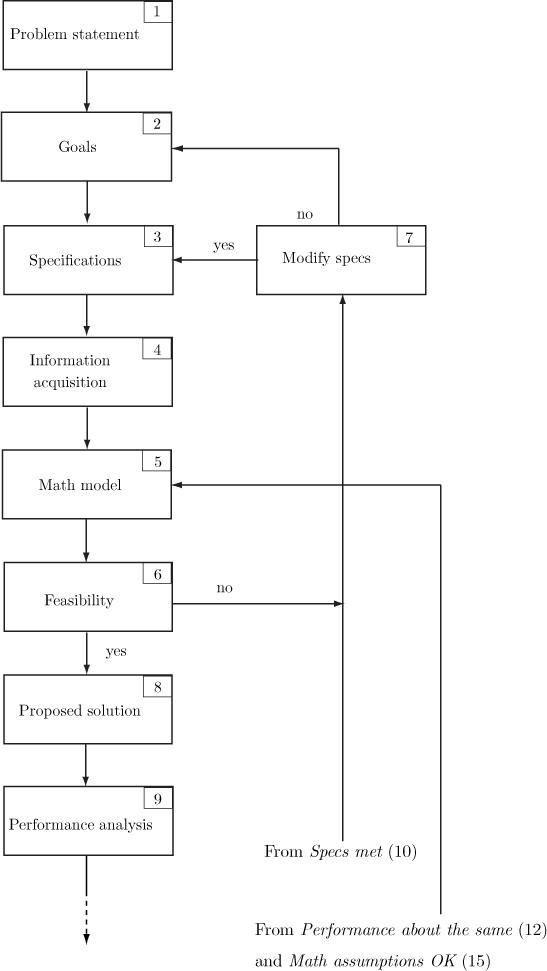

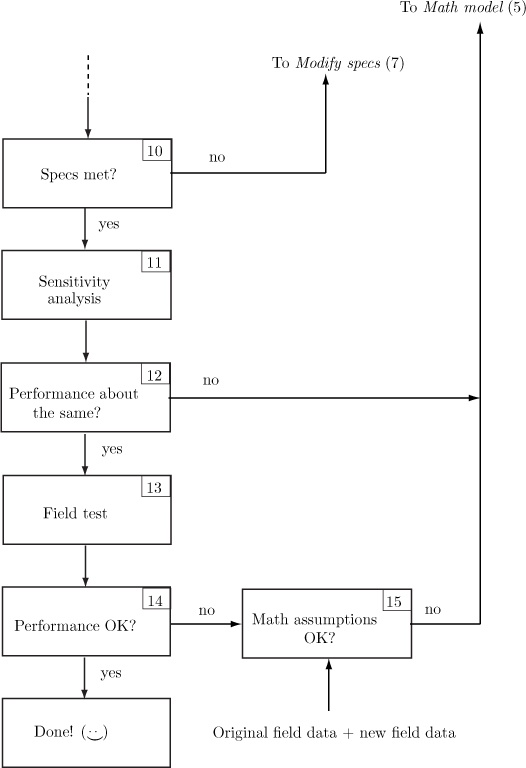

### 1. Problem Statement:
Design Image Processing Algorithm to filter out Salt-and-Pepper Noise from (Image + Noise) array.
Ideal result is to get clean Image from (Image + Noise) array.

### 2. Goals:
Exceed the Performance of existing Salt-and-Pepper Noise filtration methods (Need Performance Comparison Study of the existing methods).

Or

Get acceptable Performance of suggested filtration algorithm provided that its computational complexity allows real-time operation on target platform. (Need to clarify: What is acceptable performance? What perfomance metric should be used? What are target platform limitations?)

### 3. Specifications:
No other specs were given yet.

Q-s: 
1. Do you have baseline algorithm(currently accepted as the best)?
1. What problems with the baseline algorithm do you have so far?

### 4. Information Acquisition:
Q-s: 
1. What is image resolution?
1. Is it RGB or grayscale?
1. Is it allowed to use several consequtive frames during processing? If yes, then how many?
1. How much computational power is available?
1. Should the algorithm to be adaptive?


### 5. Mathematical Model Selection:
Obtain and analyze field data to clarify Math Model Parameters.

##### Mathematical Model Parameters:
1. Stationarity of data
2. Signal power spectral densities
3. Noise power spectral densities
4. Signal PDF
5. Noise PDF
6. Sources of interferences
7. Sources of data artifacts
8. Expected SNRs
9. Sensors limitations


##### Signal Model:
Images typical for surveillance systems.
Signal Model: Real 2D Signal
or
3D Signal (X-Y-Time) or (X-Y-C)
or
4D Signal (X-Y-C-Time)


##### Noise Model:
Noise Model: Salt-and-Pepper Noise
TODO: add math noise model descr.

##### Overall Data Model:
D(x,y) = I(x,y) + N(x,y)

##### Other Impairments Models:
No other impairments.

### 6. Feasibility Study:
An assessment of the best possible performance that is achievable by any algorithm.
It is hard to estimate the best possible performance for this task.
TODO: Look it up in the existing papers.

### 7. Specification Modifications (if necessary):
No modifications.

### 8. Proposed Solution:
Possible approaches:
1. Image Filter (Image Signal Estimator)
2. Pixel-by-pixel Noise Detector followed by Image Filter applied only to pixels with detected noise.

Steps TODO:
1. Make Model
2. Select Performance Criterion (Metric)
3. Make comparative study of the existing solution
4. Try new approaches (Volterra NN?)

### 9. Performance Analysis:
Always do a computer simulation first.

### 10. Are specifications met?:

### 11. Sensitivity Analysis:

### 12. Is Performance during Sensitivity Analysis still acceptable?:

### 13. Field Test:

### 14. Is Performance during Field Test still acceptable?:

### 15. Are Math Assumptions still correct during Field Tests?


In [2]:
# for inline image display inside notebook
# % matplotlib inline 
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

C:\Users\alpaz\anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [8]:
im = Image.open("./images/parrot.png") # read the image, provide the correct path
print(im.width, im.height, im.mode, im.format, type(im))
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
im.show() # display the image

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


In [10]:
im_g = im.convert('L') # convert the RGB color image to a grayscale image
im_g.save('./images/parrot_gray.png') # save the image to disk
Image.open("./images/parrot_gray.png").show() # read the grayscale image from disk and show

In [13]:
# Import Libraries

In [15]:
#% matplotlib inline
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
#from skimage.measure import compare_psnr
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab
# for median filter
from skimage.filters.rank import median
from skimage.morphology import disk

In [17]:
# Functions
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap=pylab.cm.gray),
    ax.set_title(title), ax.axis('off')
    #ax.set_adjustable('box-forced')
    ax.set_adjustable('box')

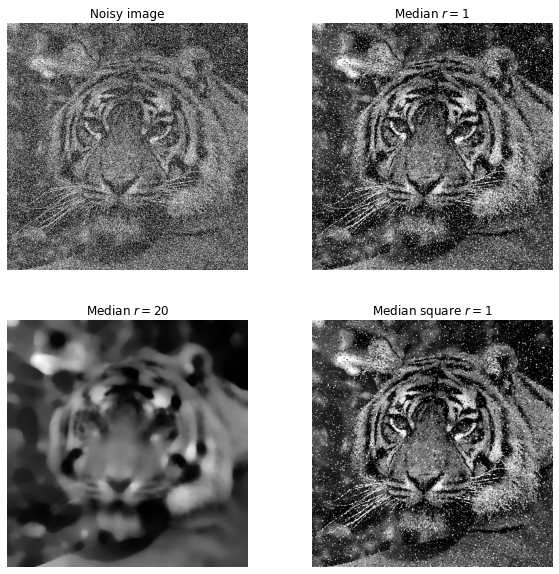

In [26]:
# for all images in folder
# open image
noisy_image = (rgb2gray(imread('./images/748px-Tiger_Face_(10971343685).jpg'))*255).astype(np.uint8)
noise = np.random.random(noisy_image.shape)

# add noise
noisy_image[noise > (0.5+0.25)] = 255
noisy_image[noise < (0.5-0.25)] = 0

# apply filter(s)
sq3 = np.ones((3, 3))
image_mf1 = median(noisy_image, disk(1))
image_mf_sq3 = median(noisy_image, sq3)
image_mf5 = median(noisy_image, disk(5))
image_mf20 = median(noisy_image, disk(20))


# calculate error for noised and filtered images


# show pictures
fig, axes = pylab.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, image_mf1, 'Median $r=1$')
#plot_gray_image(axes4, image_mf5, 'Median $r=5$')
plot_gray_image(axes4, image_mf_sq3, 'Median square $r=1$')
plot_gray_image(axes3, image_mf20, 'Median $r=20$')




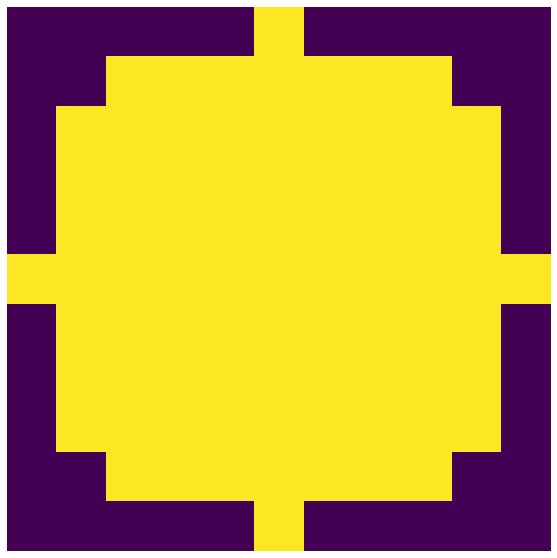

(<matplotlib.image.AxesImage at 0x1dd06d75700>, (-0.5, 10.5, 10.5, -0.5), None)

In [21]:

plt.figure(figsize=(10,10))
plt.imshow(disk(5)), plt.axis('off'), plt.show()